In [ ]:
import zipfile

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
from multiprocessing import Pool
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import layers, activations

# égalisation d'histogramme   ====>HSV

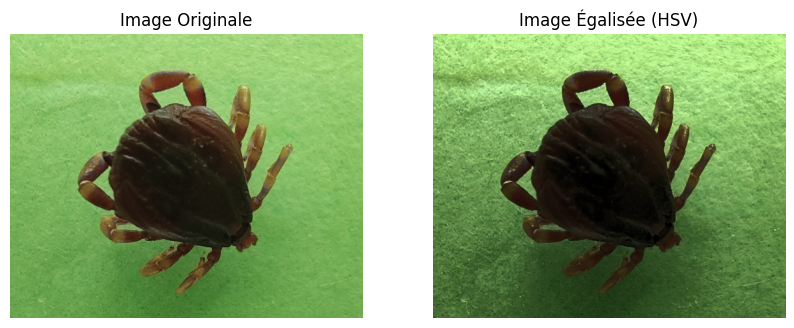

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image en couleur
image = cv2.imread('/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male/Q1.PNG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir l'image de l'espace RGB à l'espace HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Appliquer l'égalisation d'histogramme sur le canal V (Valeur)
h, s, v = cv2.split(image_hsv)
v_eq = cv2.equalizeHist(v)
image_hsv_eq = cv2.merge((h, s, v_eq))

# Convertir l'image de l'espace HSV à l'espace RGB
equalized_image_rgb = cv2.cvtColor(image_hsv_eq, cv2.COLOR_HSV2RGB)

# Afficher les images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Image Originale')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image Égalisée (HSV)')
plt.imshow(equalized_image_rgb)
plt.axis('off')

plt.show()


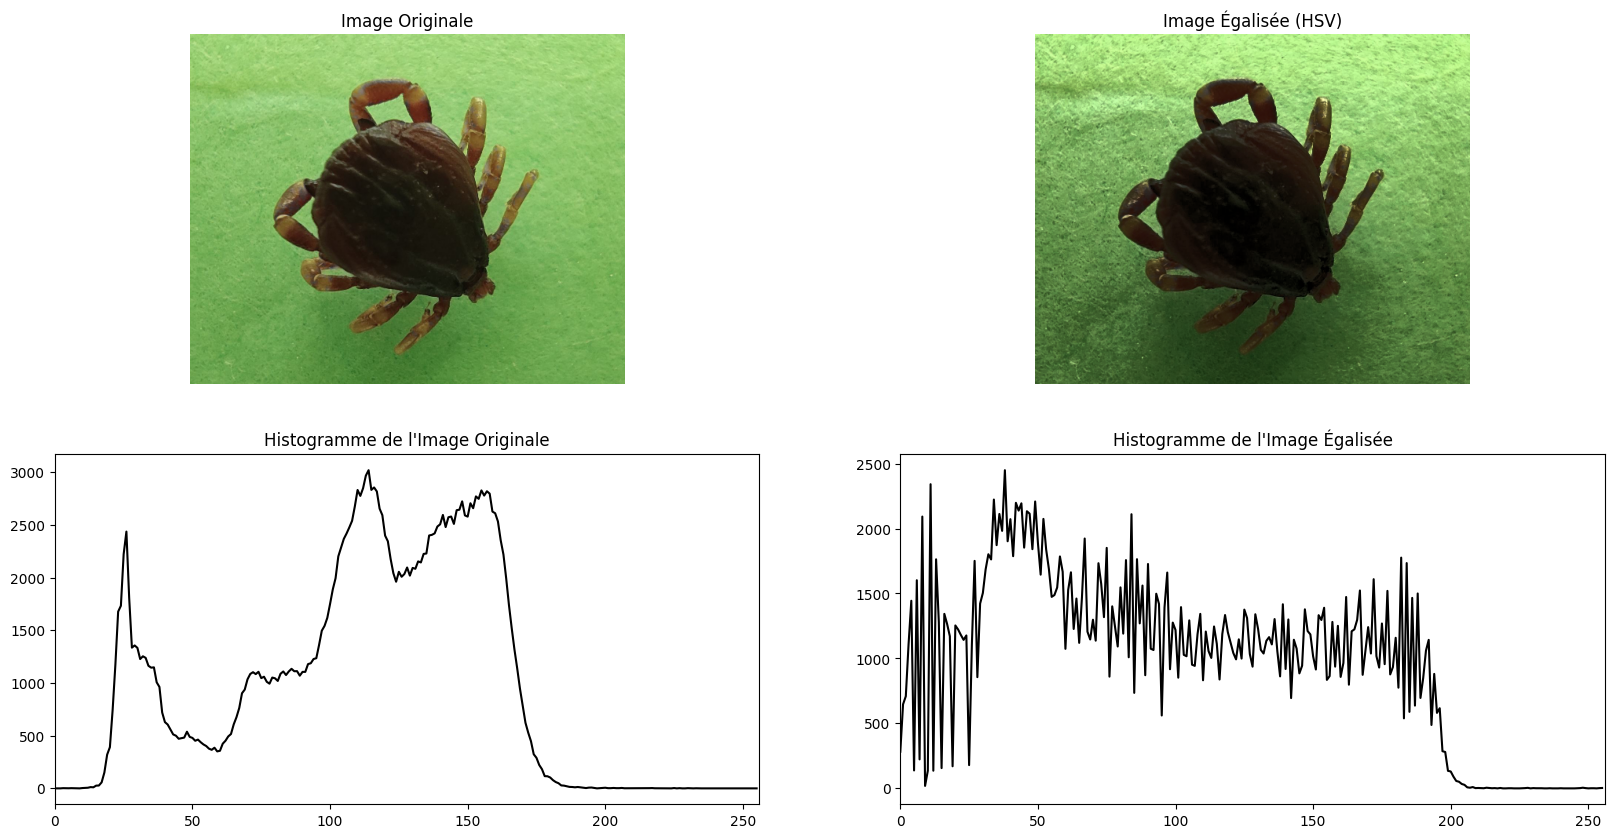

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image en couleur
image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male/Q1.PNG'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir l'image de l'espace RGB à l'espace HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Appliquer l'égalisation d'histogramme sur le canal V (Valeur)
h, s, v = cv2.split(image_hsv)
v_eq = cv2.equalizeHist(v)
image_hsv_eq = cv2.merge((h, s, v_eq))

# Convertir l'image de l'espace HSV à l'espace RGB
equalized_image_rgb = cv2.cvtColor(image_hsv_eq, cv2.COLOR_HSV2RGB)

# Calculer les histogrammes
hist_original = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image_rgb], [0], None, [256], [0, 256])

# Afficher les images et les histogrammes
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('Image Originale')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Image Égalisée (HSV)')
plt.imshow(equalized_image_rgb)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Histogramme de l\'Image Originale')
plt.plot(hist_original, color='black')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title('Histogramme de l\'Image Égalisée')
plt.plot(hist_equalized, color='black')
plt.xlim([0, 256])

plt.show()


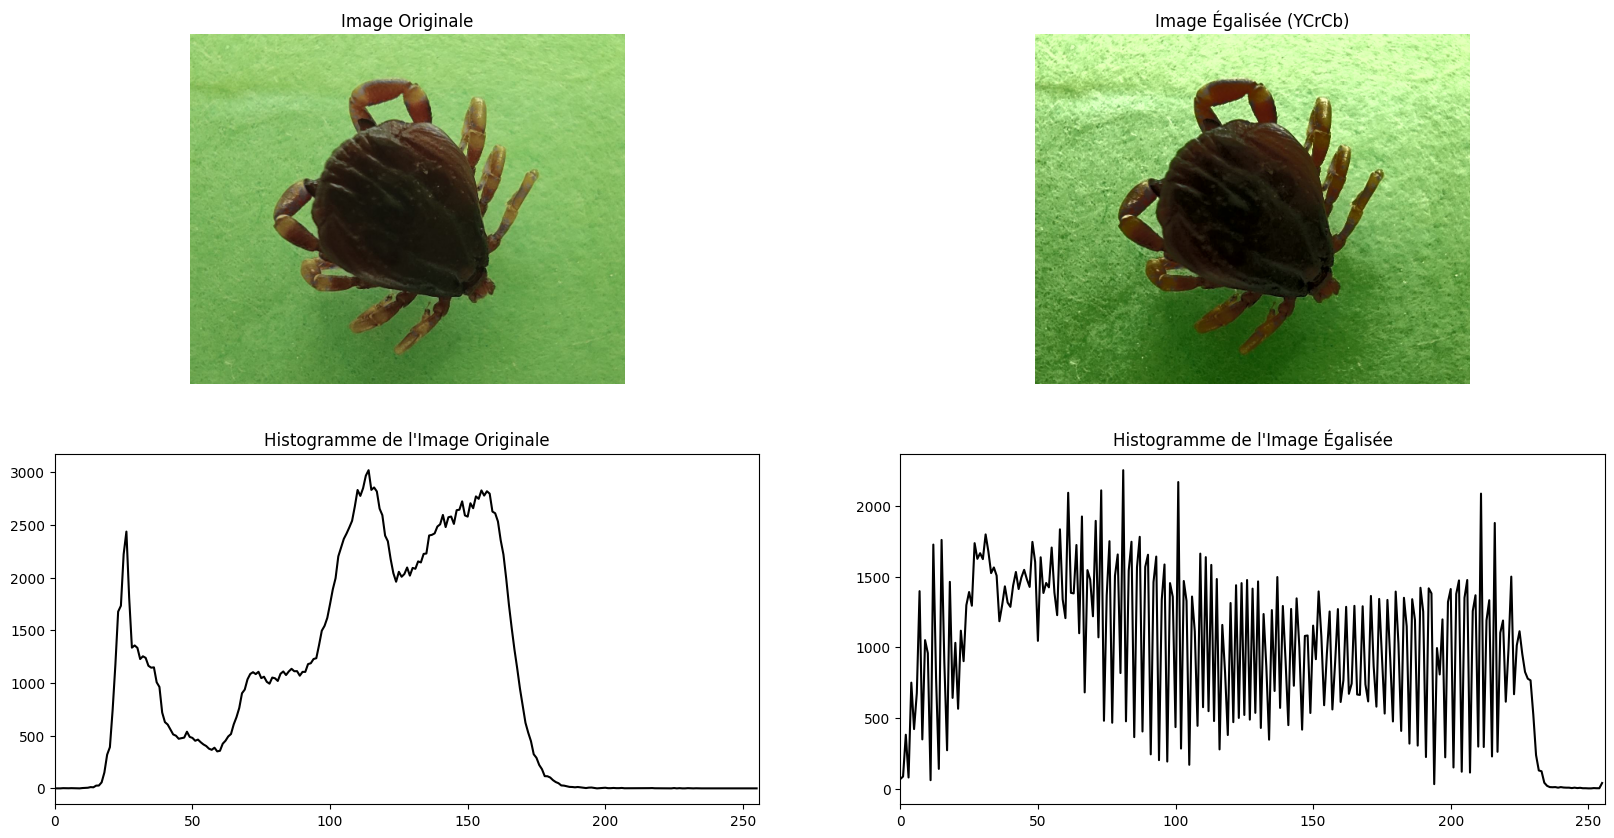

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image en couleur
image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male/Q1.PNG'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir l'image de l'espace RGB à l'espace YCrCb
image_y_cr_cb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)

# Appliquer l'égalisation d'histogramme sur le canal Y
y, cr, cb = cv2.split(image_y_cr_cb)
y_eq = cv2.equalizeHist(y)
image_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))

# Convertir l'image de l'espace YCrCb à l'espace RGB
equalized_image_rgb = cv2.cvtColor(image_y_cr_cb_eq, cv2.COLOR_YCrCb2RGB)


# Calculer les histogrammes
hist_original = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image_rgb], [0], None, [256], [0, 256])

# Afficher les images et les histogrammes
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('Image Originale')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Image Égalisée (YCrCb)')
plt.imshow(equalized_image_rgb)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Histogramme de l\'Image Originale')
plt.plot(hist_original, color='black')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title('Histogramme de l\'Image Égalisée')
plt.plot(hist_equalized, color='black')
plt.xlim([0, 256])

plt.show()


# 2)Normalisation

Dans de nombreux cas, les données peuvent avoir des échelles très différentes, c’est-à-dire que certaines variables peuvent avoir des valeurs beaucoup plus grandes ou plus petites que d’autres. Cela peut poser des problèmes pour certaines techniques statistiques ou algorithmes d’apprentissage automatique, car ils peuvent être sensibles à l’échelle des données. La normalisation permet de résoudre ce problème en ajustant les valeurs des variables pour qu’elles se situent dans un intervalle spécifié, souvent entre 0 et 1, ou autour de la moyenne avec un écart-type donné.

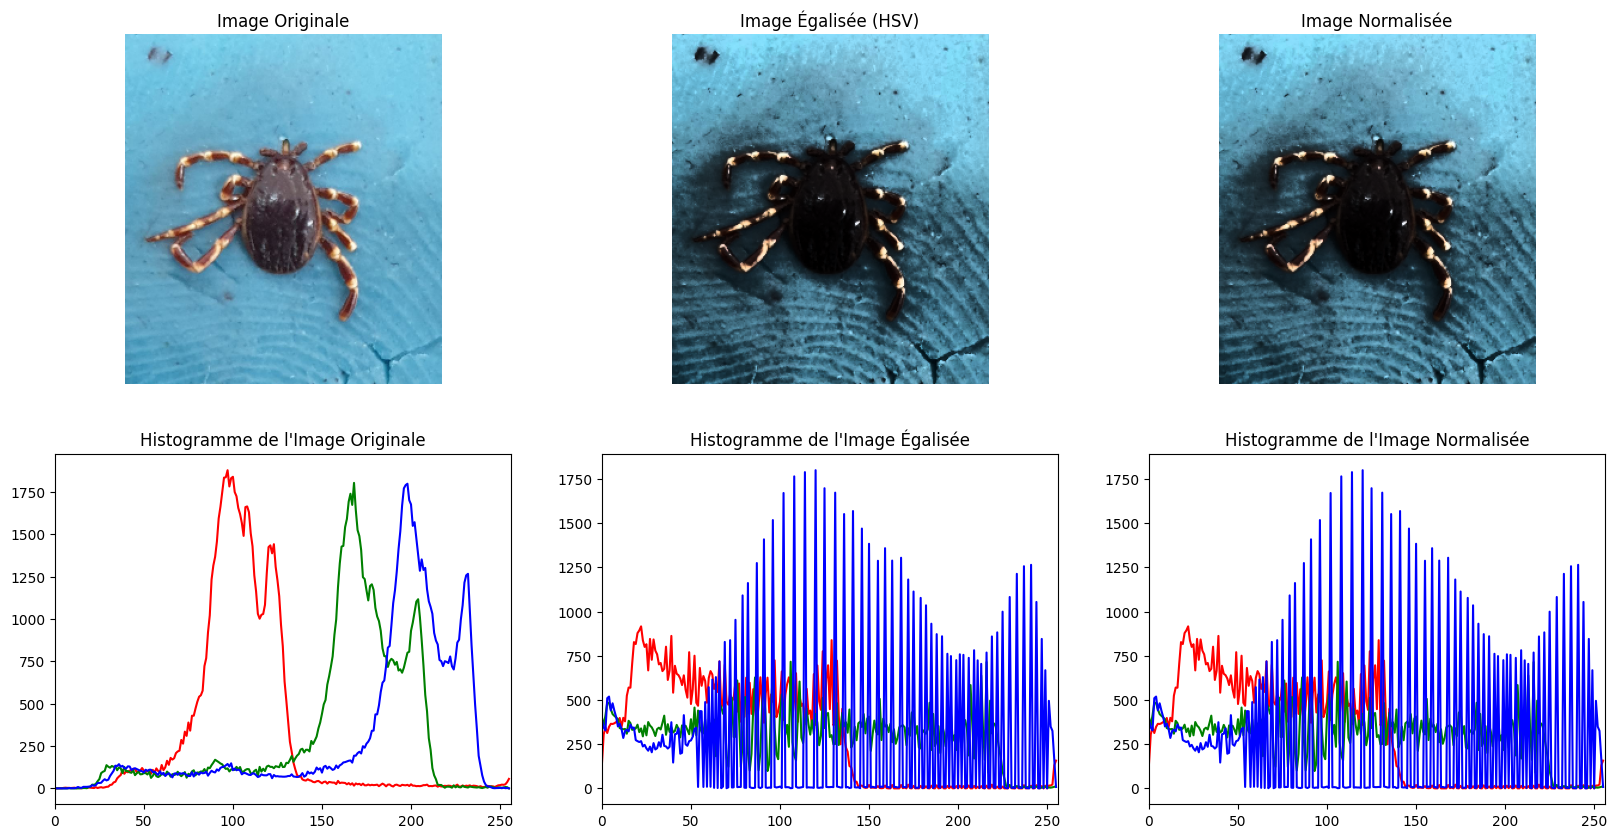

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en couleur
image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male/Q102.PNG'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir l'image en espace de couleur HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Appliquer l'égalisation d'histogramme sur le canal V (Valeur)
h, s, v = cv2.split(image_hsv)
v_eq = cv2.equalizeHist(v)
image_hsv_eq = cv2.merge((h, s, v_eq))

# Convertir l'image de l'espace HSV à l'espace RGB
equalized_image = cv2.cvtColor(image_hsv_eq, cv2.COLOR_HSV2RGB)

# Normaliser l'image en divisant les valeurs de pixel par 255
normalized_image = equalized_image / 255.0

# Calculer les histogrammes pour chaque canal (R, G, B)
colors = ('r', 'g', 'b')
hist_original = [cv2.calcHist([image_rgb], [i], None, [256], [0, 256]) for i in range(3)]
hist_equalized = [cv2.calcHist([equalized_image], [i], None, [256], [0, 256]) for i in range(3)]
hist_normalized = [cv2.calcHist([equalized_image], [i], None, [256], [0, 256]) for i in range(3)]

# Afficher les images et les histogrammes
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Image Originale')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Image Égalisée (HSV)')
plt.imshow(equalized_image)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Image Normalisée')
plt.imshow(normalized_image)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Histogramme de l\'Image Originale')
for i, color in enumerate(colors):
    plt.plot(hist_original[i], color=color)
plt.xlim([0, 256])

plt.subplot(2, 3, 5)
plt.title('Histogramme de l\'Image Égalisée')
for i, color in enumerate(colors):
    plt.plot(hist_equalized[i], color=color)
plt.xlim([0, 256])

plt.subplot(2, 3, 6)
plt.title('Histogramme de l\'Image Normalisée')
for i, color in enumerate(colors):
    plt.plot(hist_normalized[i], color=color)
plt.xlim([0, 256])

plt.show()


# Probléme d'égalisation d'histogramme




In [ ]:
def should_equalize(image):
    # Exemple de critère : image à faible contraste
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contrast = gray.std()
    return contrast < 50

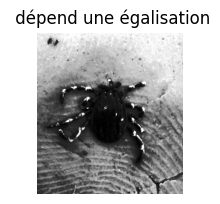

In [ ]:
image_path='/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male/Q102.PNG'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
if should_equalize(image_rgb):
  image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
  equalized_image = cv2.equalizeHist(image_gray)
  image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

  plt.subplot(2, 3, 1)
  plt.title(' dépend une égalisation')
  plt.imshow(image)
  plt.axis('off')
else:
  plt.subplot(2, 3, 1)
  plt.title('ne dépend pas égalisation')
  plt.imshow(image)
  plt.axis('off')
  print("ne dépend pas égalisation")

In [ ]:
image_path='/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/C102.PNG'
image = cv2.imread(image_path)
if should_equalize(image):
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  equalized_image = cv2.equalizeHist(image_gray)
  image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

  plt.subplot(2, 3, 1)
  plt.title('Image Originale')
  plt.imshow(image)
  plt.axis('off')
else:
  print("ne dépend pas égalisation")

ne dépend pas égalisation


ne dépend pas égalisation


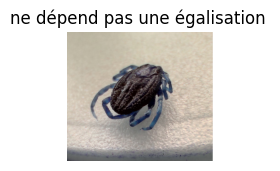

In [ ]:
image_path='/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/C31.PNG'
image = cv2.imread(image_path)
if should_equalize(image):
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  equalized_image = cv2.equalizeHist(image_gray)
  image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

  plt.subplot(2, 3, 1)
  plt.title('dépend  une égalisation ')
  plt.imshow(image)
  plt.axis('off')
else:
  print("ne dépend pas égalisation")
  plt.subplot(2, 3, 1)
  plt.title('ne dépend pas une égalisation ')
  plt.imshow(image)
  plt.axis('off')

# Redimentionner les images



1.   Chercher le plus grand element puisque j'ai des images qui prennent la totalité d'èspace de l'image
2.   Redimentionner tous les images .



In [ ]:
def plus_grand_Dimension(dossier_source):
  max_hauteur = None
  max_largeur = None

  for filename in os.listdir(dossier_source):

    if filename.endswith((".jpg", ".jpeg", ".png","JPG","PNG")):
        image = cv2.imread(os.path.join(dossier_source, filename))
        hauteur_actuelle, largeur_actuelle, _ = image.shape

        if (max_hauteur is None or hauteur_actuelle > max_hauteur) and \
           (max_largeur is None or largeur_actuelle > max_largeur):
            max_hauteur = hauteur_actuelle
            max_largeur = largeur_actuelle
  print(f"Dimensions de la plus grande image: hauteur = {max_hauteur}, largeur = {max_largeur}")
  return (max_hauteur,max_largeur)

In [ ]:
path='/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle'
plus_grand_Dimension(path)

Dimensions de la plus petite image: hauteur = 861, largeur = 1032


(861, 1032)

In [ ]:
path='/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male'
plus_grand_Dimension(path)

Dimensions de la plus petite image: hauteur = 864, largeur = 1184


(864, 1184)